In [1]:
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import math

In [2]:
def getMatrix(width,height):
    i=0
    j=0
    while i<width:
        while j<height:
            #print('i=',i)
            #print('j=',j)
            pixel_Matrix[i,j]=img.getpixel((i,j))
            j+=1
        j=0
        i+=1
        

In [3]:
def pearson_corr(fi,fj):
    x=[]
    y=[]
    a=[]
    b=[]
    a=np.asarray(pixel_Matrix[fi,:]) #selecting entire row
    b=np.asarray(pixel_Matrix[fj,:])
    
    i=0
    while i<height:
        x.append(a[0,i])
        y.append(b[0,i])
        i+=1
    i=0
    
    k_x=[]
    k_y=[]
    k_x_sq=[]
    k_y_sq=[]
    l=[]
    
    sum_x=np.sum(x)
    sum_y=np.sum(y)
    x_bar=sum_x/len(x)
    y_bar=sum_y/len(y)
    for i in x:
        k_x.append(i-x_bar)
    for i in y:
        k_y.append(i-y_bar)
    for i in k_x:
        k_x_sq.append(i*i)
    for i in k_y:
        k_y_sq.append(i*i)
    sum_k_x_sq=np.sum(k_x_sq)
    std_dv_x=sum_k_x_sq/len(x)
    sum_k_y_sq=np.sum(k_y_sq)
    std_dv_y=sum_k_y_sq/len(y)
    i=0
    while i<len(x):
        l.append(k_x[i]*k_y[i])
        i+=1
    sum_of_l=np.sum(l)
    cov_x_y=sum_of_l/len(x)
    #pears_corr=cov_x_y/((math.sqrt(std_dv_x))*(math.sqrt(std_dv_y)))
    pears_corr=float("{:.2f}".format(cov_x_y/((math.sqrt(std_dv_x))*(math.sqrt(std_dv_y)))))
    return pears_corr


In [4]:
def vertical_corr(width,height):
    m=0
    n=m+1
    a=[]
    while n<height-1:
        ver_corr_matrix.append(pearson_corr(m,n))
        m+=1
        n+=1
    #ver_corr_matrix.append(a)
            

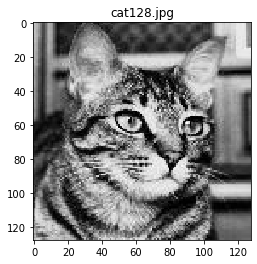

Image size :  128 * 128
Matrix PXL :
 [[183 177 172 ... 158 145 179]
 [176 175 174 ... 171 159 180]
 [160 164 166 ... 115 151 199]
 ...
 [140 141 144 ...  90  92  96]
 [127 128 130 ...  90  92  97]
 [129 129 129 ...  89  92  97]]


In [5]:
img=Image.open(r'C:\Users\Biswarup Mistry\Downloads\cat128.jpg')
px=img.load()
plt.imshow(img, cmap=plt.cm.gray, interpolation='nearest')
plt.title('cat128.jpg')
plt.show()
#print(img.size)
width, height = img.size

#print('height : ',height)
#print('width : ',width)

print('Image size : ',height,'*',width)


pixel_Matrix = np.matrix(np.arange(width*height).reshape(width,height))
getMatrix(width,height)
print('Matrix PXL :\n',pixel_Matrix)



ver_corr_matrix=[]#np.matrix(np.arange(height*width).reshape(height,width))


In [6]:
vertical_corr(width,height)


In [7]:
print(ver_corr_matrix)
len(ver_corr_matrix)

[0.86, 0.95, 0.9, 0.94, 0.94, 0.91, 0.9, 0.87, 0.92, 0.96, 0.93, 0.86, 0.9, 0.9, 0.94, 0.89, 0.83, 0.87, 0.8, 0.82, 0.77, 0.72, 0.79, 0.74, 0.78, 0.83, 0.8, 0.78, 0.82, 0.85, 0.87, 0.86, 0.85, 0.87, 0.84, 0.89, 0.87, 0.89, 0.79, 0.86, 0.84, 0.84, 0.76, 0.74, 0.82, 0.79, 0.83, 0.77, 0.74, 0.67, 0.77, 0.78, 0.84, 0.86, 0.77, 0.72, 0.78, 0.75, 0.81, 0.79, 0.8, 0.78, 0.78, 0.74, 0.84, 0.85, 0.82, 0.86, 0.9, 0.81, 0.86, 0.87, 0.84, 0.87, 0.88, 0.88, 0.87, 0.87, 0.75, 0.71, 0.76, 0.81, 0.67, 0.78, 0.8, 0.73, 0.82, 0.77, 0.75, 0.77, 0.68, 0.73, 0.84, 0.88, 0.9, 0.74, 0.83, 0.86, 0.89, 0.73, 0.91, 0.88, 0.82, 0.79, 0.87, 0.94, 0.95, 0.93, 0.95, 0.97, 0.97, 0.97, 0.97, 0.98, 0.99, 0.99, 1.0, 1.0, 0.99, 0.99, 0.99, 0.99, 0.99, 0.98, 0.97, 0.99]


126